## Import Packages

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

from collections import Counter
from library.sb_utils import save_file


ModuleNotFoundError: No module named 'library'

## Load Data Sets

In [ ]:
# Loading data sets
train_data = pd.read_csv("C:\\Users\\yy\Desktop\\SpringBoard Data Science\\Capstone-Project-2---Identify-Genetic-Disorder-is-Children\\Data\\Raw Data\\train.csv")
raw_train_data = pd.read_csv("C:\\Users\\yy\Desktop\\SpringBoard Data Science\\Capstone-Project-2---Identify-Genetic-Disorder-is-Children\\Data\\Raw Data\\train.csv")
test_data = pd.read_csv("C:\\Users\\yy\Desktop\\SpringBoard Data Science\\Capstone-Project-2---Identify-Genetic-Disorder-is-Children\\Data\\Raw Data\\test.csv")
raw_test_data = pd.read_csv("C:\\Users\\yy\Desktop\\SpringBoard Data Science\\Capstone-Project-2---Identify-Genetic-Disorder-is-Children\\Data\\Raw Data\\test.csv")

In [ ]:
# Checking to make sure data set loaded properly
train_data.head()

In [ ]:
test_data.head()

## Column Names and Descriptions (Attached with data set)

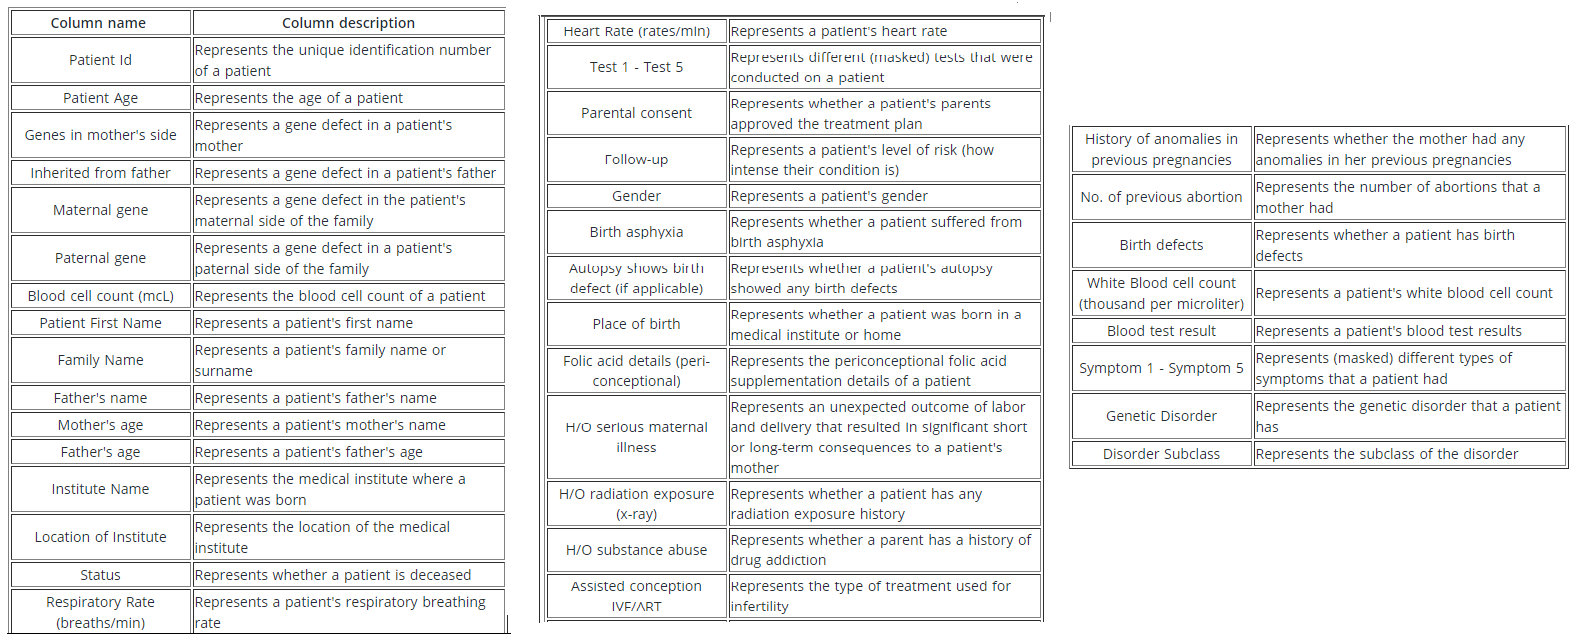

## Evaluation of Train Data Set

Since I will be training my model based on the training data set, I will be focusing my data exploration on the train_data set. Any data clean up applied and moved foward in the train_data can be applied to the test_data, so my model can be used on the test_data set with the same parameters.

In [ ]:
# Identify all the columns
train_data.columns

Let's first clean up the column names so they are readable and consistent for future processing.

In [ ]:
new_col_name = {"Patient Id" : "Patient_Id",
                            "Patient Age" : "Patient_Age",
                            "Genes in mother's side" : "Mother_Gene",
                            "Inherited from father" : "Father_Gene",
                            "Maternal gene" : "Maternal_Gene",
                            "Paternal gene" : "Paternal_Gene",
                            "Blood cell count (mcL)" : "Blood_Cell",
                            "Patient First Name" : "Patient_Name",
                            "Family Name" : "Family_Name",
                            "Father's name" : "Father_Name",
                            "Mother's age" : "Mother_Age",
                            "Father's age" : "Father_Age",
                            "Institute Name" : "Institute_Name",
                            "Location of Institute" : "Institute_Location",
                            "Respiratory Rate (breaths/min)" : "Respiratory_Rate",
                            "Heart Rate (rates/min" : "Heart_Rate",
                            "Test 1" : "Test_1",
                            "Test 2" : "Test_2",
                            "Test 3" : "Test_3",
                            "Test 4" : "Test_4",
                            "Test 5" : "Test_5",
                            "Parental consent" : "Parental_Consent",
                            "Follow-up" : "Follow_Up",
                            "Birth asphyxia" : "Birth_Asphyxia",
                            "Autopsy shows birth defect (if applicable)" : "Autopsy_Birth_Defect",
                            "Place of birth" : "Birth_Place",
                            "Folic acid details (peri-conceptional)" : "Folic_Acid_Details",
                            "H/O serious maternal illness" : "Maternal_Illness",
                            "H/O radiation exposure (x-ray)" : "Radiation_Exposure",
                            "H/O substance abuse" : "Substance_Abuse",
                            "Assisted conception IVF/ART" : "Assisted_Conception",
                            "History of anomalies in previous pregnancies" : "History_Pregnancies",
                            "No. of previous abortion" : "Previous_Abortions",
                            "Birth defects" : "Birth_Defects",
                            "White Blood cell count (thousand per microliter)" : "White_Blood_Cell",
                            "Blood test result" : "Blood_Test",
                            "Symptom 1" : "Symptom_1",
                            "Symptom 2" : "Symptom_2",
                            "Symptom 3" : "Symptom_3",
                            "Symptom 4" : "Symptom_4",
                            "Symptom 5" : "Symptom_5",
                            "Genetic Disorder" : "Genetic_Disorder",
                            "Disorder Subclass" : "Disorder_Subclass"}

train_data.rename(columns=new_col_name, inplace=True)
raw_train_data.rename(columns=new_col_name, inplace=True)

In [ ]:
# Check to see column names have been changed
train_data.columns

The `Genetic_Disorder` and `Disorder_Subclass` are the two target columns that will need to be identified for the test_data.

In [ ]:
# Transposed data set of the first 30 to glance at the dataset
train_data.head(30).T

In [ ]:
train_data.shape

## Missing Data

In [ ]:
missing_data = pd.concat([train_data.isnull().sum(), 100 * train_data.isnull().mean()], axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by="count", ascending=False)

It looks like `Family_Name`, `Mother_Age`, `Father_Age`, and `Institute_Name` have more than 20% missing data. But looking back at the head view of the entire dataset, to see if there was a comparision between `Institue_Name` and `Institue_Location`, `Institue_Location` also had missing data, but as a "-". This quick summary of `.isnull()` does not catch these kinds of null notations. Going through the head data again, there are different kinds of null values not caught in the other columns, so I will need to go through the data to set null values appropriately. There are also some missing values for the target columns `Genetic_Disorder` and `Disorder_Subclass` as well.

#### Missing Target Data (COME BACK TO AT END)

In [ ]:
train_data.Disorder_Subclass.value_counts(dropna=False)

In [ ]:
train_data.Genetic_Disorder.value_counts(dropna=False) 

In [ ]:
missing_target_data = train_data[['Disorder_Subclass', 'Genetic_Disorder']].isnull().sum(axis=1)
missing_target_data.value_counts()/len(missing_data) * 100

In [ ]:
# train_data = train_data[missing_data != 2]

## Checking for Duplicates

In [ ]:
train_data.Patient_Id.value_counts()

In [ ]:
Name_dict = tuple(zip(train_data["Patient_Name"], train_data["Family_Name"], train_data["Father_Name"], train_data["Patient_Age"]))
sorted(list(Counter(Name_dict).values()), reverse=True)[:5]

There are only unique `Patient_Id`, but I wanted to double check to make sure there were no duplicated child under different `Patient_Id`. I combined `Patient_Name`, `Family_Name`, `Father_Name`, and `Patient_Age` and counted if there were any duplicates. If all of these parameters matched, it would most likely be the same child, but I would further investigate with other parameters if needed to make sure. But the results returned no duplicates. Given that there were no duplicates and I know from context that names will not provide meaningful correlations, I dropped these columns early.

In [ ]:
train_data.drop(columns=["Patient_Id", "Patient_Name", "Family_Name", "Father_Name"], inplace=True)

In [ ]:
train_data.shape

### Checking Each Column for Valid Values

In [ ]:
# Running list to collect all null type values to be replaced with NaN
nullList = []

In [ ]:
# Creating a dict of unique values within each feature, includes Nan
valueCheck = {k : train_data[k].value_counts(dropna=False) for k in train_data.columns}

#### Patient_Age

In [ ]:
print(sorted(valueCheck['Patient_Age'].keys()))
print(valueCheck['Patient_Age'].keys().isnull())

Valid `nan` null value, rest are actual values.

#### Mother_Gene

In [ ]:
print(valueCheck['Mother_Gene'].keys())

No null values.

#### Father_Gene

In [ ]:
print(valueCheck['Father_Gene'].keys())
print(valueCheck['Father_Gene'].keys().isnull())

Valid `nan`.

#### Maternal_Gene

In [ ]:
print(valueCheck['Maternal_Gene'].keys())
print(valueCheck['Maternal_Gene'].keys().isnull())

Valid `nan`.

#### Paternal_Gene

In [ ]:
print(valueCheck['Paternal_Gene'].keys())

#### Blood_Cell

In [ ]:
print(sorted(valueCheck['Blood_Cell'].keys()[:5]))
print(sorted(valueCheck['Blood_Cell'].keys(), reverse=True)[:5])
print(valueCheck['Blood_Cell'].keys().isnull().sum())

#### Mother_Age

In [ ]:
print(valueCheck['Mother_Age'].keys())
print(valueCheck['Mother_Age'].keys().isnull())

#### Father_Age

In [ ]:
print(valueCheck['Father_Age'].keys())
print(valueCheck['Father_Age'].keys().isnull())

#### Institute_Name

In [ ]:
print(valueCheck['Institute_Name'].keys())
print(valueCheck['Institute_Name'].keys().isnull())

In [ ]:
nullList.append("Not applicable")

I can see from the list that there is `Not applicable`, which can be considered null. So I add it to my `nullList`.

#### Institute_Location

In [ ]:
print(valueCheck['Institute_Location'].keys())
print(valueCheck['Institute_Location'].keys().isnull())

In [ ]:
nullList.append("-")

I can see from the list that there is `-`, which can be considered null. So I add it to my `nullList`.

#### Status

In [ ]:
print(valueCheck['Status'].keys())
print(valueCheck['Status'].keys().isnull())

#### Respiratory_Rate

In [ ]:
print(valueCheck['Respiratory_Rate'].keys())
print(valueCheck['Respiratory_Rate'].keys().isnull())

#### Heart_Rate

In [ ]:
print(valueCheck['Heart_Rate'].keys())
print(valueCheck['Heart_Rate'].keys().isnull())

#### Test_1 - Test_5

In [ ]:
print(valueCheck['Test_1'].keys())
print(valueCheck['Test_1'].keys().isnull())

print(valueCheck['Test_2'].keys())
print(valueCheck['Test_2'].keys().isnull())

print(valueCheck['Test_3'].keys())
print(valueCheck['Test_3'].keys().isnull())

print(valueCheck['Test_4'].keys())
print(valueCheck['Test_4'].keys().isnull())

print(valueCheck['Test_5'].keys())
print(valueCheck['Test_5'].keys().isnull())

#### Parental_Consent

In [ ]:
print(valueCheck['Parental_Consent'].keys())
print(valueCheck['Parental_Consent'].keys().isnull())

#### Follow_Up

In [ ]:
print(valueCheck['Follow_Up'].keys())
print(valueCheck['Follow_Up'].keys().isnull())

#### Gender

In [ ]:
print(valueCheck['Gender'].keys())
print(valueCheck['Gender'].keys().isnull())

In [ ]:
nullList.append("Ambiguous")

I can see from the list that there is `Ambiguous`, which can be considered null. So I add it to my `nullList`.

#### Birth_Asphyxia

In [ ]:
print(valueCheck['Birth_Asphyxia'].keys())
print(valueCheck['Birth_Asphyxia'].keys().isnull())

In [ ]:
nullList.append("No record")
nullList.append("Not available")

I can see from the list that there is `No record`, `Not available`, which can be considered null. So I add it to my nullList.

#### Autopsy_Birth_Defect

In [ ]:
print(valueCheck['Autopsy_Birth_Defect'].keys())
print(valueCheck['Autopsy_Birth_Defect'].keys().isnull())

In [ ]:
train_data["Autopsy_Birth_Defect"].replace("None", "No", inplace=True)

I can see from the list that there is `Not applicable`, which can be considered null. So I add it to my nullList.
But I also see `None`, which is the same as `No`, but currently divides the data between the two. Thus I replaced `None` to be `No`.

#### Birth_Place

In [ ]:
print(valueCheck['Birth_Place'].keys())
print(valueCheck['Birth_Place'].keys().isnull())

#### Folic_Acid_Details

In [ ]:
print(valueCheck['Folic_Acid_Details'].keys())
print(valueCheck['Folic_Acid_Details'].keys().isnull())

#### Maternal_Illness

In [ ]:
print(valueCheck['Maternal_Illness'].keys())
print(valueCheck['Maternal_Illness'].keys().isnull())

#### Radiation_Exposure

In [ ]:
print(valueCheck['Radiation_Exposure'].keys())
print(valueCheck['Radiation_Exposure'].keys().isnull())

I can see from the list that there is `Not applicable` and `-`, which can be considered null. But they are already in my nullList.

#### Substance_Abuse

In [ ]:
print(valueCheck['Substance_Abuse'].keys())
print(valueCheck['Substance_Abuse'].keys().isnull())

I can see from the list that there is `Not applicable` and `-`, which can be considered null. But they are already in my nullList.

#### Assisted_Conception

In [ ]:
print(valueCheck['Assisted_Conception'].keys())
print(valueCheck['Assisted_Conception'].keys().isnull())

#### History_Pregnancies

In [ ]:
print(valueCheck['History_Pregnancies'].keys())
print(valueCheck['History_Pregnancies'].keys().isnull())

#### Previous_Abortions

In [ ]:
print(valueCheck['Previous_Abortions'].keys())
print(valueCheck['Previous_Abortions'].keys().isnull())

#### Birth_Defects

In [ ]:
print(valueCheck['Birth_Defects'].keys())
print(valueCheck['Birth_Defects'].keys().isnull())

#### White_Blood_Cell

In [ ]:
print(sorted(valueCheck['White_Blood_Cell'].keys()[:5]))
print(sorted(valueCheck['White_Blood_Cell'].keys(), reverse=True)[:5])
print(valueCheck['White_Blood_Cell'].keys().isnull().sum())

#### Blood_Test

In [ ]:
print(valueCheck['Blood_Test'].keys())
print(valueCheck['Blood_Test'].keys().isnull())

In [ ]:
nullList.append("inconclusive")

I can see from the list that there is `inconclusive`, which can be considered null. So I add it to my nullList.

#### Symptom_1 - Symptom_5

In [ ]:
print(valueCheck['Symptom_1'].keys())
print(valueCheck['Symptom_1'].keys().isnull())

print(valueCheck['Symptom_2'].keys())
print(valueCheck['Symptom_2'].keys().isnull())

print(valueCheck['Symptom_3'].keys())
print(valueCheck['Symptom_3'].keys().isnull())

print(valueCheck['Symptom_4'].keys())
print(valueCheck['Symptom_4'].keys().isnull())

print(valueCheck['Symptom_5'].keys())
print(valueCheck['Symptom_5'].keys().isnull())

#### Genetic_Disorder

In [ ]:
print(valueCheck['Genetic_Disorder'].keys())
print(valueCheck['Genetic_Disorder'].keys().isnull())

#### Disorder_Subclass

In [ ]:
print(valueCheck['Disorder_Subclass'].keys())
print(valueCheck['Disorder_Subclass'].keys().isnull())

In [ ]:
# Check my nullList
nullList

In [ ]:
# Apply my nullList to entire data
train_data.replace(nullList, np.NaN, inplace=True)

In [ ]:
# Calculate the missing data again
missing_data = pd.concat([train_data.isnull().sum(), 100 * train_data.isnull().mean()], axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by="count", ascending=False)

In [ ]:
msno.matrix(train_data)
plt.show()

With the identification of all null values, there is a lot more missing data then we initially found out for many of these columns, and even past 50% as well. But we will continue to evaluate the data and come back to how we can handle the missing data.

## Target Columns

In [ ]:
# Genetic Disorder
gd_counts = train_data.Genetic_Disorder.value_counts()

print(gd_counts)

mylab = gd_counts.index

plt.pie(gd_counts, labels=mylab, autopct='%1.1f%%')
plt.show()

In [ ]:
# Disorder Subclass
ds_counts = train_data.Disorder_Subclass.value_counts()

print(ds_counts)

mylab = ds_counts.index
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1.5, 2)


plt.pie(ds_counts, labels=mylab, explode=explode, autopct='%1.1f%%')
plt.show()

In [ ]:
gb = train_data.groupby("Genetic_Disorder")["Disorder_Subclass"].value_counts()
print(gb)

gb.unstack().plot(kind='barh')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## Categorical Features

In [ ]:
train_data.dtypes

In [ ]:
catData = train_data.select_dtypes('object').drop(["Genetic_Disorder", "Disorder_Subclass"], axis=1)
catData.head().T

All of these columns may provide useful information for evaluation, except for `Institute_Name` and `Institute_Location`. But I need to check if this is a 1 to 1 correlation or if there are problems within these columns.

#### Institute_Name and Institute_Location Evaluation

In [ ]:
catData[['Institute_Name', 'Institute_Location']].nunique()

It looks like there is one more Institute_Name than Institute_Locations.

In [ ]:
# Zip the corresponding institute name and location per row
institute_dict = dict(zip(train_data['Institute_Name'], train_data['Institute_Location']))

# Then find the associated number of institute per location
flipped = {}
  
for key, value in institute_dict.items():
    if value not in flipped:
        flipped[value] = [key]
    else:
        flipped[value].append(key)

for key, value in flipped.items():
    print(key, ' : ', len(value))
    print()

It looks like some locations have multiple institutes associated with it. This makes these columns difficult to be valuable or valid, given some google searches confirm different institutes rather than the same institute with different names. Also in the context of identifying disorders, institute name and location are not significant. So I will drop these columns.

In [ ]:
train_data.drop(columns=["Institute_Name", "Institute_Location"], inplace=True)
catData.drop(columns=["Institute_Name", "Institute_Location"], inplace=True)

### Rest of the Categorical Data

In [ ]:
# Genetic Disorder Count Graphs
cols  = catData.columns

sns.set_style("darkgrid")
fig, ax = plt.subplots(len(cols), figsize = (5,100))
plt.subplots_adjust(hspace = 0.5)

for i, col in enumerate(cols):
    sns.countplot(data=catData,
                  x=col,
                  hue=train_data["Genetic_Disorder"],
                  ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel(None)
    ax[i].legend([],[], frameon=False)
    ax[i].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
# Disorder Subclass Count Graphs
cols  = catData.columns

sns.set_style("darkgrid")
fig, ax = plt.subplots(len(cols), figsize = (5,100))
plt.subplots_adjust(hspace = 0.5)

for i, col in enumerate(cols):
    sns.countplot(data=catData,
                  x=col,
                  hue=train_data["Disorder_Subclass"],
                  ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel(None)
    ax[i].legend([],[], frameon=False)
    ax[i].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Going through the subplots, I noticed that `Parental_Consent` only has one type of displayed catagory. So I will drop this column as well.

In [ ]:
train_data.drop("Parental_Consent", axis=1, inplace=True)

## Numerical Features

In [ ]:
numData = train_data.select_dtypes('float64')

In [ ]:
numData.describe().T

In [ ]:
numData.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
plt.show()

* There are no variation within the Test columns.
* `Previous_Abortions` and the `symptom` columns look to have defined categorical type data. 
* `Patient_Age`, `Blood_Cell`, `Mother_Age`, `Father_Age`, and `White_Blood_Cell` are continuous data.

#### Test Columns

In [ ]:
numData.Test_1.value_counts()

In [ ]:
numData.Test_2.value_counts()

In [ ]:
numData.Test_3.value_counts()

In [ ]:
numData.Test_4.value_counts()

In [ ]:
numData.Test_5.value_counts()

Looking at the `value_counts` among the 5 different tests, there is actually 0 variations as they are 0 for Test 1, 2, 3, and 5, with Test 4 being only 1.

In [ ]:
train_data.drop(columns=["Test_1", "Test_2", "Test_3", "Test_4", "Test_5"], inplace=True)

Thus I dropped these columns as well.

#### Symptom Columns

In [ ]:
# Genetic Disorder plots for Symptoms
cols = ["Symptom_1", "Symptom_2", "Symptom_3", "Symptom_4", "Symptom_5"]

sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 5, figsize=(12,8), sharey=True)

for i, col in enumerate(cols):
    sns.countplot(data=numData,
                  x=col,
                  hue=train_data["Genetic_Disorder"],
                  ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].legend([],[], frameon=False)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
# Disorder Subclass plots for Symptoms
sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 5, figsize=(12,8), sharey=True)

for i, col in enumerate(cols):
    sns.countplot(data=numData,
                  x=col,
                  hue=train_data["Disorder_Subclass"],
                  ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].legend([],[], frameon=False)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Looks like there could be something useful in the symptoms columns if treated similar to the categorical features.

### Combing back to Missing Data

Now that the data has been cleaned up of unnecessary columns, I can come back to view the missing data with what is left in the dataset.

In [ ]:
# Calculate the missing data again
missing_data = pd.concat([train_data.isnull().sum(), 100 * train_data.isnull().mean()], axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by="count", ascending=False)

In [ ]:
msno.matrix(train_data)
plt.show()

`Birth_Asphyxia`, `Autopsy_Birth_Defect`, `Radiation_Exposure` and `Substance_Abuse` have more than 50% of the data missing with `Gender` missing 40%. This will be something that may need to be dropped after deeper exploration in EDA.

In [ ]:
missing_target_data = train_data[['Disorder_Subclass', 'Genetic_Disorder']].isnull().sum(axis=1)
missing_target_data.value_counts()/len(missing_target_data) * 100

It looks like 1.26% of the data have both the target columns missing, meaning that these rows of data will be useless in helping the model down the line. So they will need to be dropped.

In [ ]:
train_data = train_data[missing_target_data != 2]

### Finalization of Data Wrangling

In [ ]:
sorted(list(set(raw_train_data.columns) - set(train_data.columns)))

In [ ]:
train_data.shape

I removed a total of 12 columns that provided no information or potential correlations and 278 rows of data points that could not contribute to modeling the two target columns: `Genetic_Disorder` and `Disorder_Subclass`.

In [ ]:
# Save cleaned data
train_data.to_csv('../Data/train_data_cleaned.csv')